# EXPLORATORY DATA ANALYSIS - RETAIL
### THE SPARKS FOUNDATION-GRIP (MAY 2023)
### Submitted by - SHRUTI KHANDELWAL

### TASK:
Perform EDA on the dataset 'SampleSuperStore'

As a business manager, try to find out the weak areas where you can work to make more profit.

What all business problems you can derive by exploring the data?

##### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##### Loading Dataset

In [2]:
df = pd.read_csv(r'C:\Users\USER\Downloads\SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#Checking the rows and columns of the dataset
df.shape

(9994, 13)

In [4]:
#Complete information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
#Checking null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
#Checking duplicates
df.duplicated().sum()

17

In [7]:
#Remove Duplicates
df = df.drop_duplicates()

#Let's check again now
df.duplicated().sum()

0

In [8]:
#Summary stats of numerical column
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


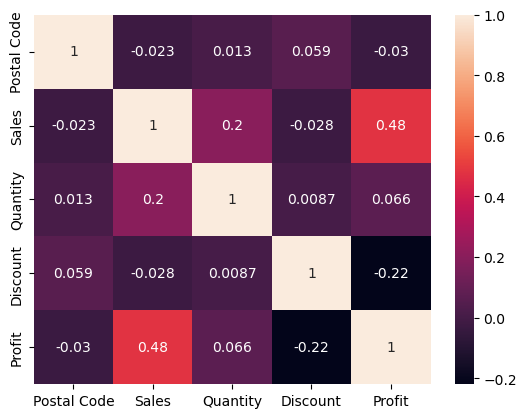

In [9]:
#Let's check correlation 
sns.heatmap(df.corr(), annot=True)
plt.show()

### EXPLORATORY DATA ANALYSIS

#### Univariate Analysis

In [10]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

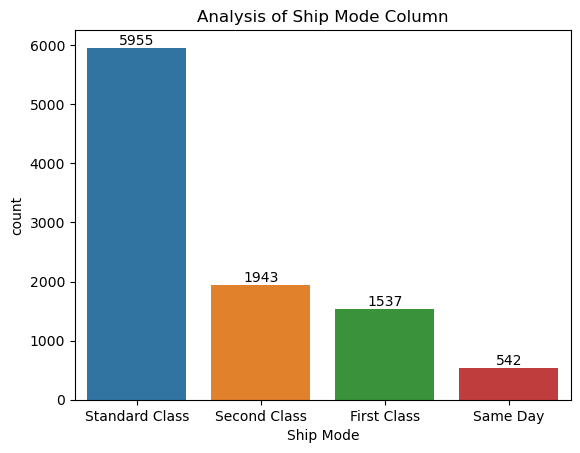

In [11]:
#visualizing ship mode column
labels = df['Ship Mode'].value_counts().sort_values(ascending=False).values
ax = sns.countplot(x = df['Ship Mode'],order=df['Ship Mode'].value_counts(ascending=False).index)
ax.bar_label(container = ax.containers[0],labels = labels)
plt.title('Analysis of Ship Mode Column')
plt.show()

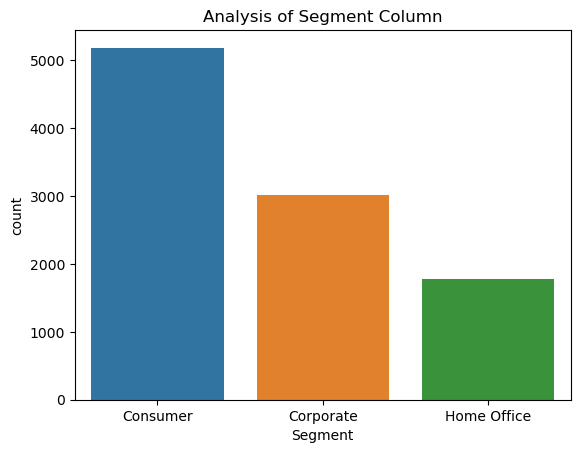

In [12]:
#visualizing Segment column
sns.countplot(x = df.Segment)
plt.title('Analysis of Segment Column')
plt.show()

In [13]:
df.Country.value_counts()

United States    9977
Name: Country, dtype: int64

In [14]:
#As there is only one country and postal code, we should drop it. It's of no use.
df = df.drop(columns=['Country','Postal Code'], axis=1)

In [15]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [16]:
df.City.value_counts()

New York City      914
Los Angeles        746
Philadelphia       536
San Francisco      506
Seattle            424
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

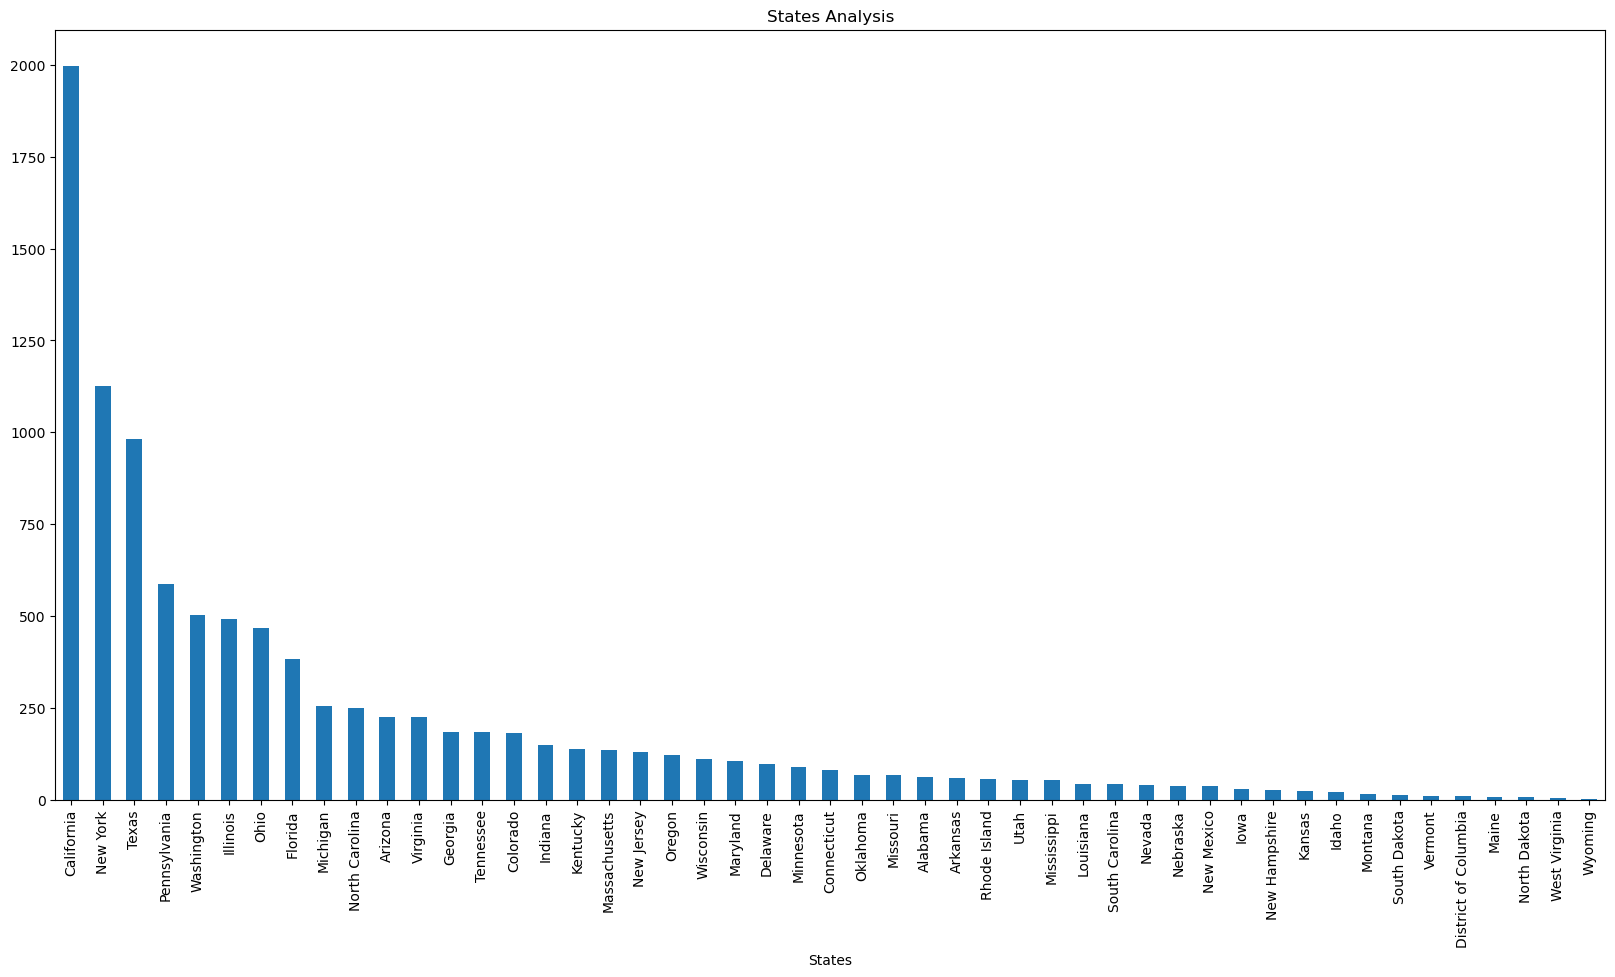

In [17]:
#Visualizing States Columns
plt.figure(figsize=(20,10))
df.State.value_counts().plot(kind='bar')
plt.xlabel('States')
plt.title('States Analysis')
plt.show()

In [18]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [19]:
df.Region.value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

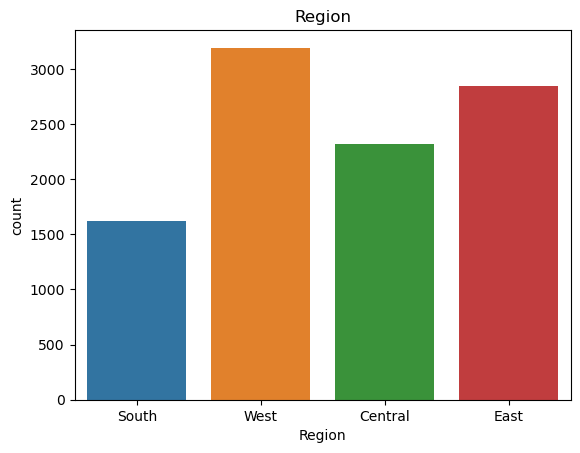

In [20]:
sns.countplot(x=df.Region)
plt.title('Region')
plt.show()

In [21]:
df.Category.value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

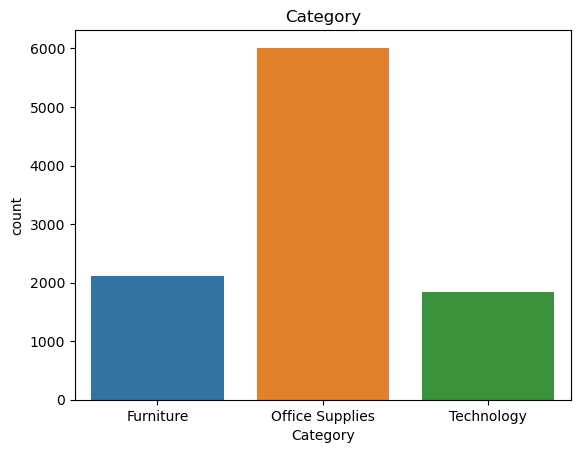

In [22]:
sns.countplot(x=df.Category)
plt.title('Category')
plt.show()

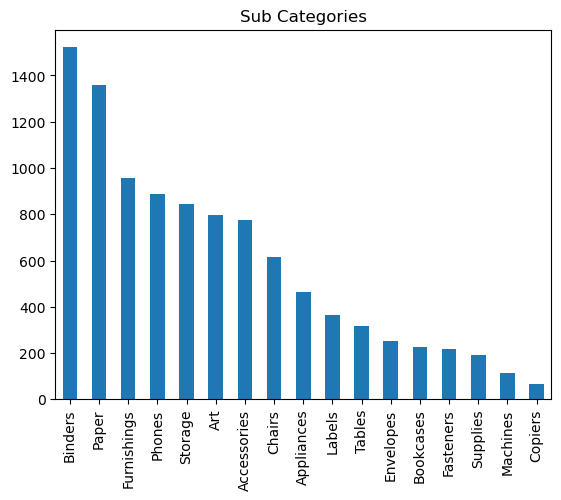

In [23]:
df['Sub-Category'].value_counts().plot(kind='bar')
plt.title('Sub Categories')
plt.show()

In [24]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

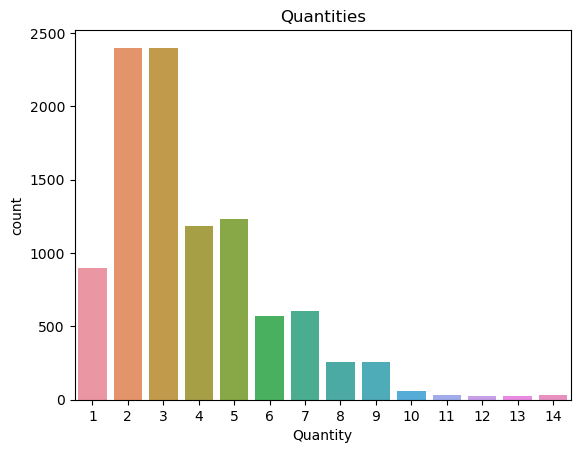

In [25]:
sns.countplot(x = df.Quantity)
plt.title('Quantities')
plt.show()

In [26]:
#Sales Column
df.Sales.value_counts()

12.960     55
19.440     37
15.552     37
10.368     35
25.920     34
           ..
4.240       1
319.960     1
646.740     1
81.940      1
243.160     1
Name: Sales, Length: 5825, dtype: int64

<Axes: >

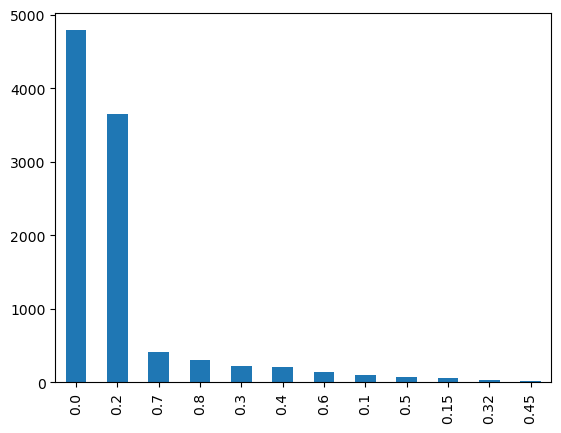

In [27]:
#Discount column
df.Discount.value_counts().plot(kind='bar')

No discount, 20% Discount and 70% Discount were given a lot. 

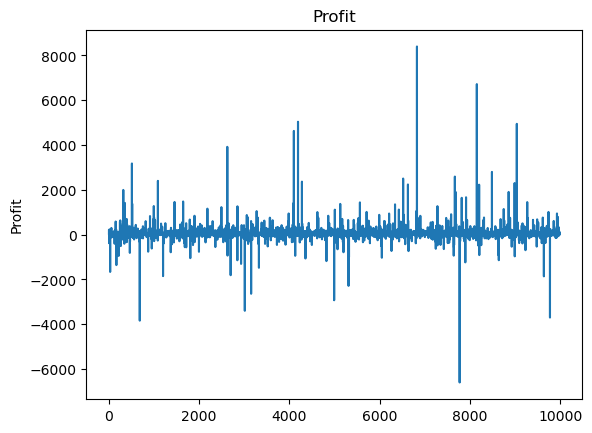

In [28]:
sns.lineplot(df.Profit)
plt.title('Profit')
plt.show()

In [29]:
#As also shown in above figure
print('Max Profit: ',df.Profit.max())
print('Min Profit: ', df.Profit.min())

Max Profit:  8399.976
Min Profit:  -6599.978


### Bivariate Analysis

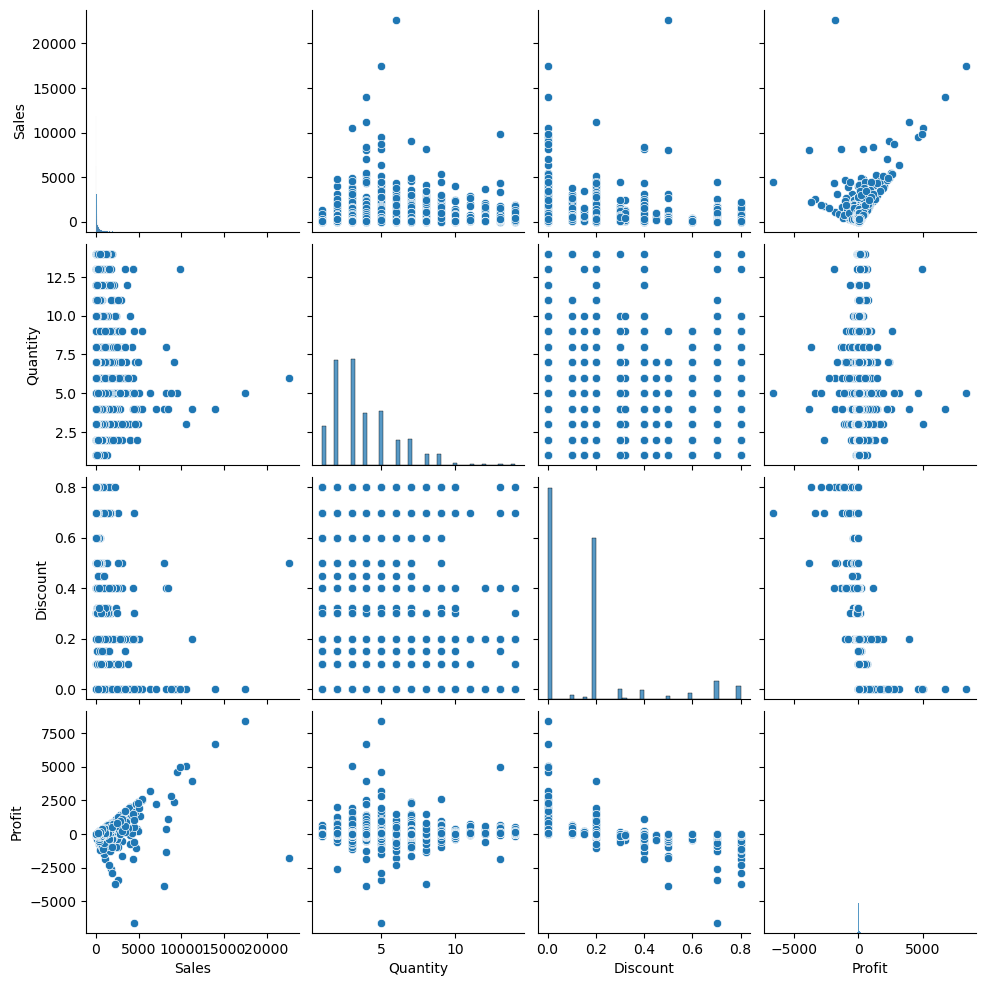

In [30]:
sns.pairplot(df[['Sales', 'Quantity', 'Discount', 'Profit']])
plt.show()

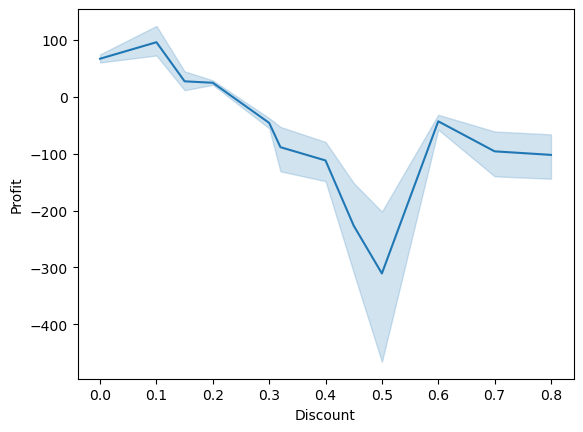

In [31]:
#Discount vs Profit
sns.lineplot(x='Discount', y='Profit', data=df)
plt.show()

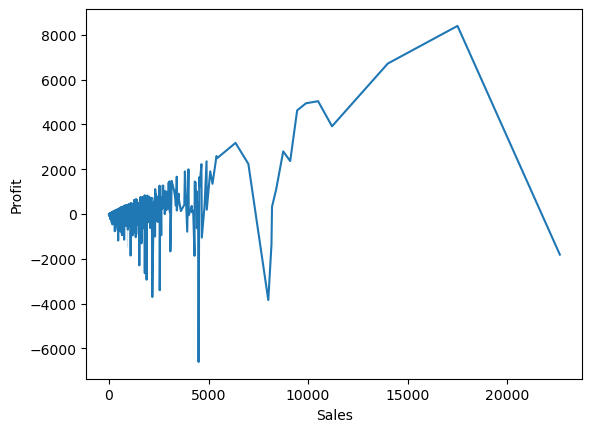

In [32]:
#Sales vs Profit
sns.lineplot(x='Sales', y='Profit', data=df)
plt.show()

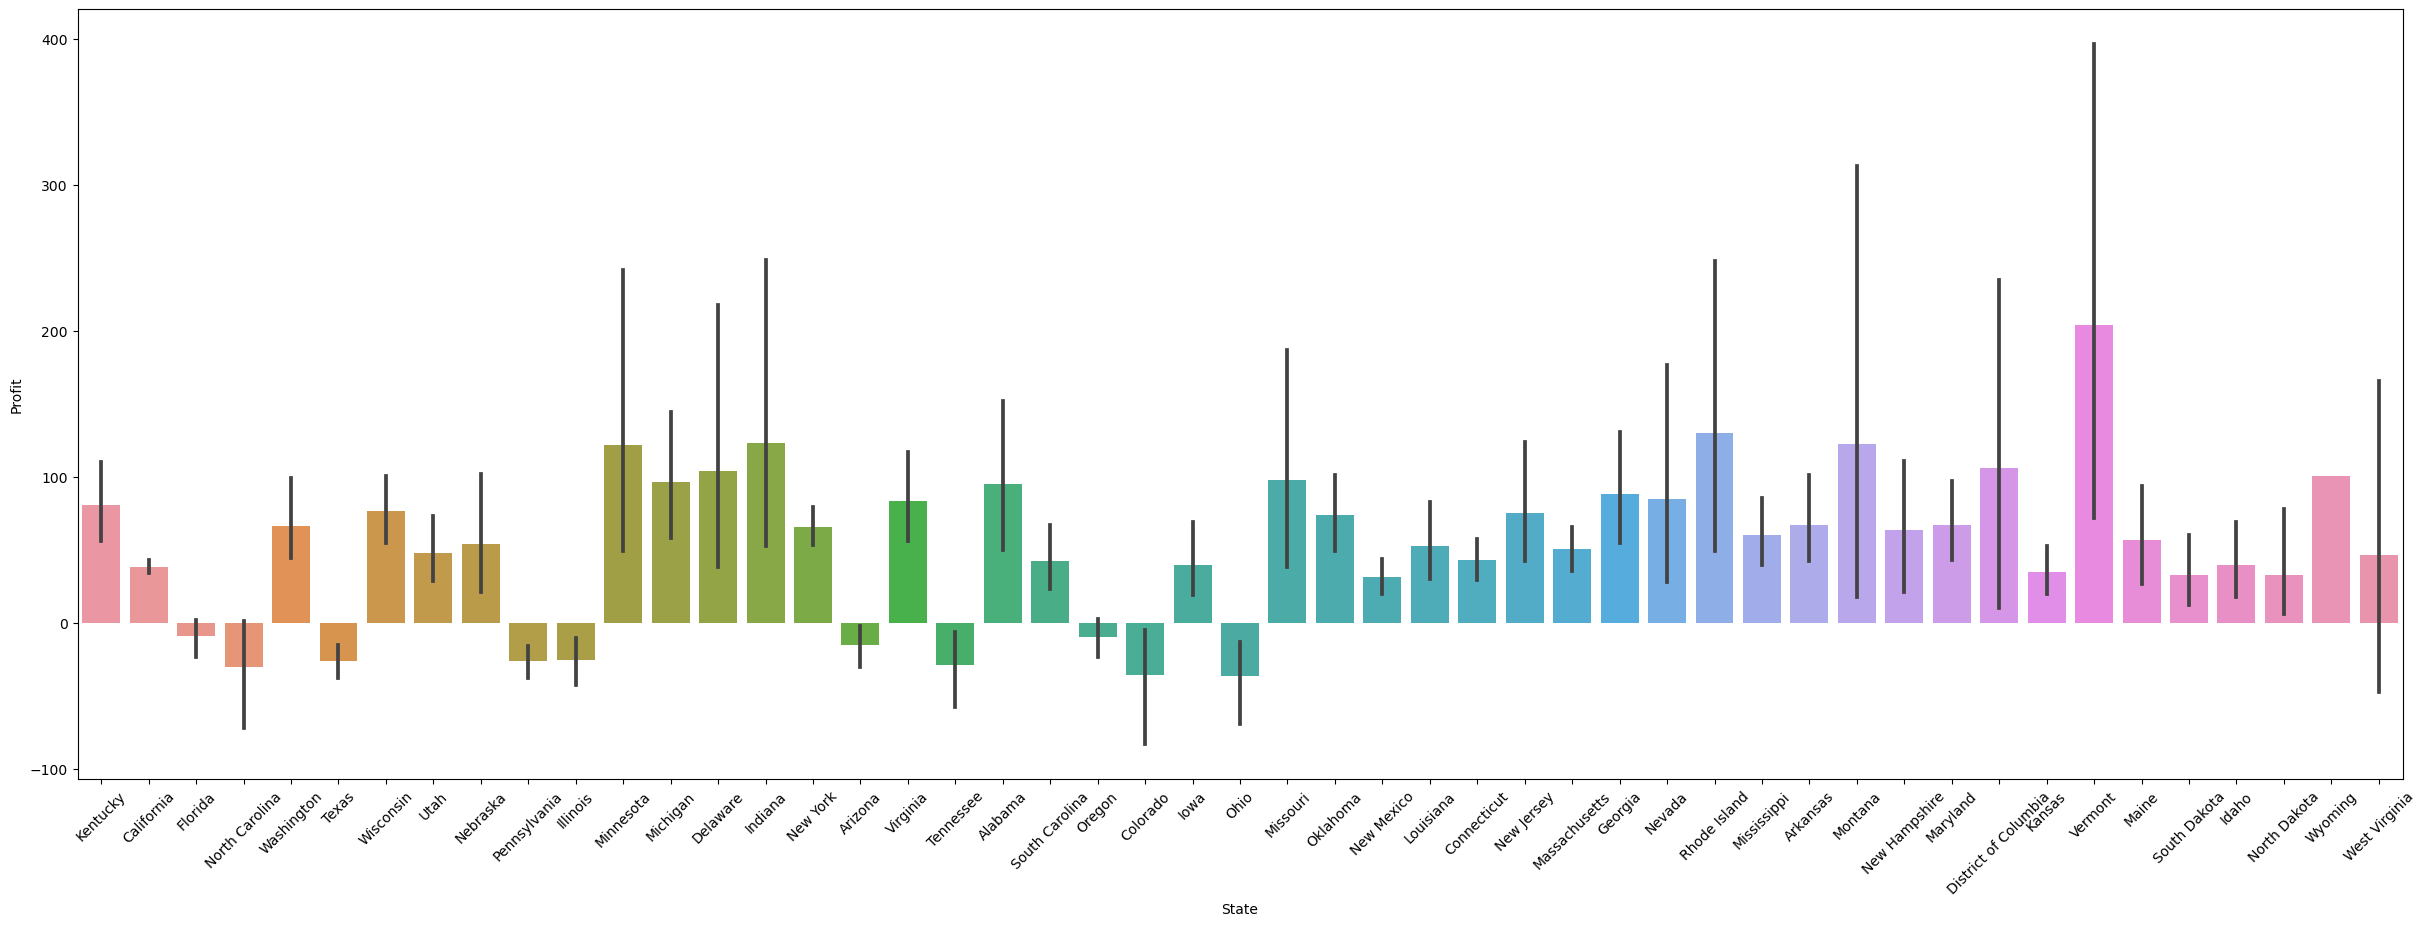

In [33]:
#State vs Profit
plt.figure(figsize=(30,10))
sns.barplot(x='State', y='Profit', data=df)
plt.xticks(rotation= 45)
plt.show()

## STATE WISE PROFIT ANALYSIS

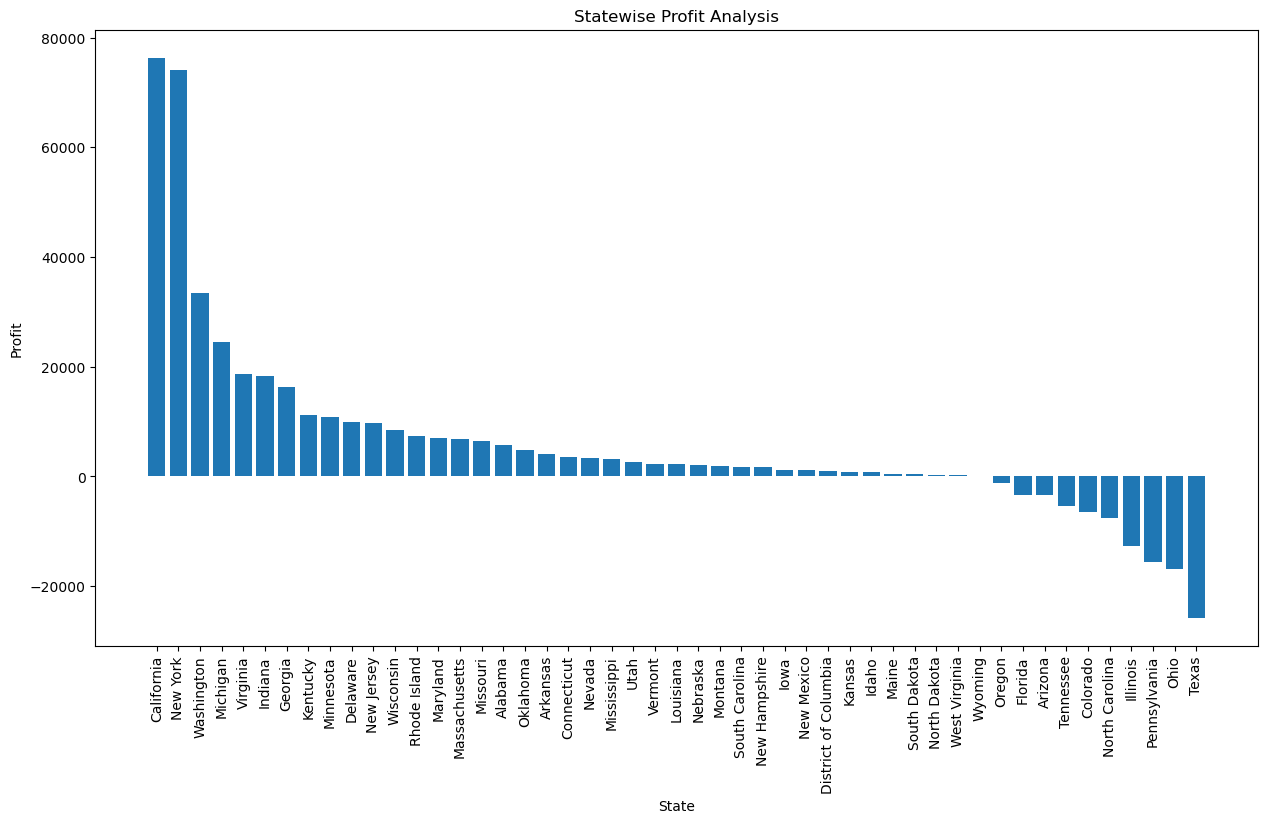

In [34]:
# Group the data by state and compute the total profit for each state
state_profit = df.groupby(['State'])['Profit'].sum().reset_index()

# Sort the data in descending order of profit
state_profit = state_profit.sort_values(by='Profit', ascending=False)

# Plot the statewise profit
plt.figure(figsize=(15, 8))
plt.bar(state_profit['State'], state_profit['Profit'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Statewise Profit Analysis')
plt.show()

## STATE WISE SALES, DISCOUNT AND PROFIT ANALYSIS

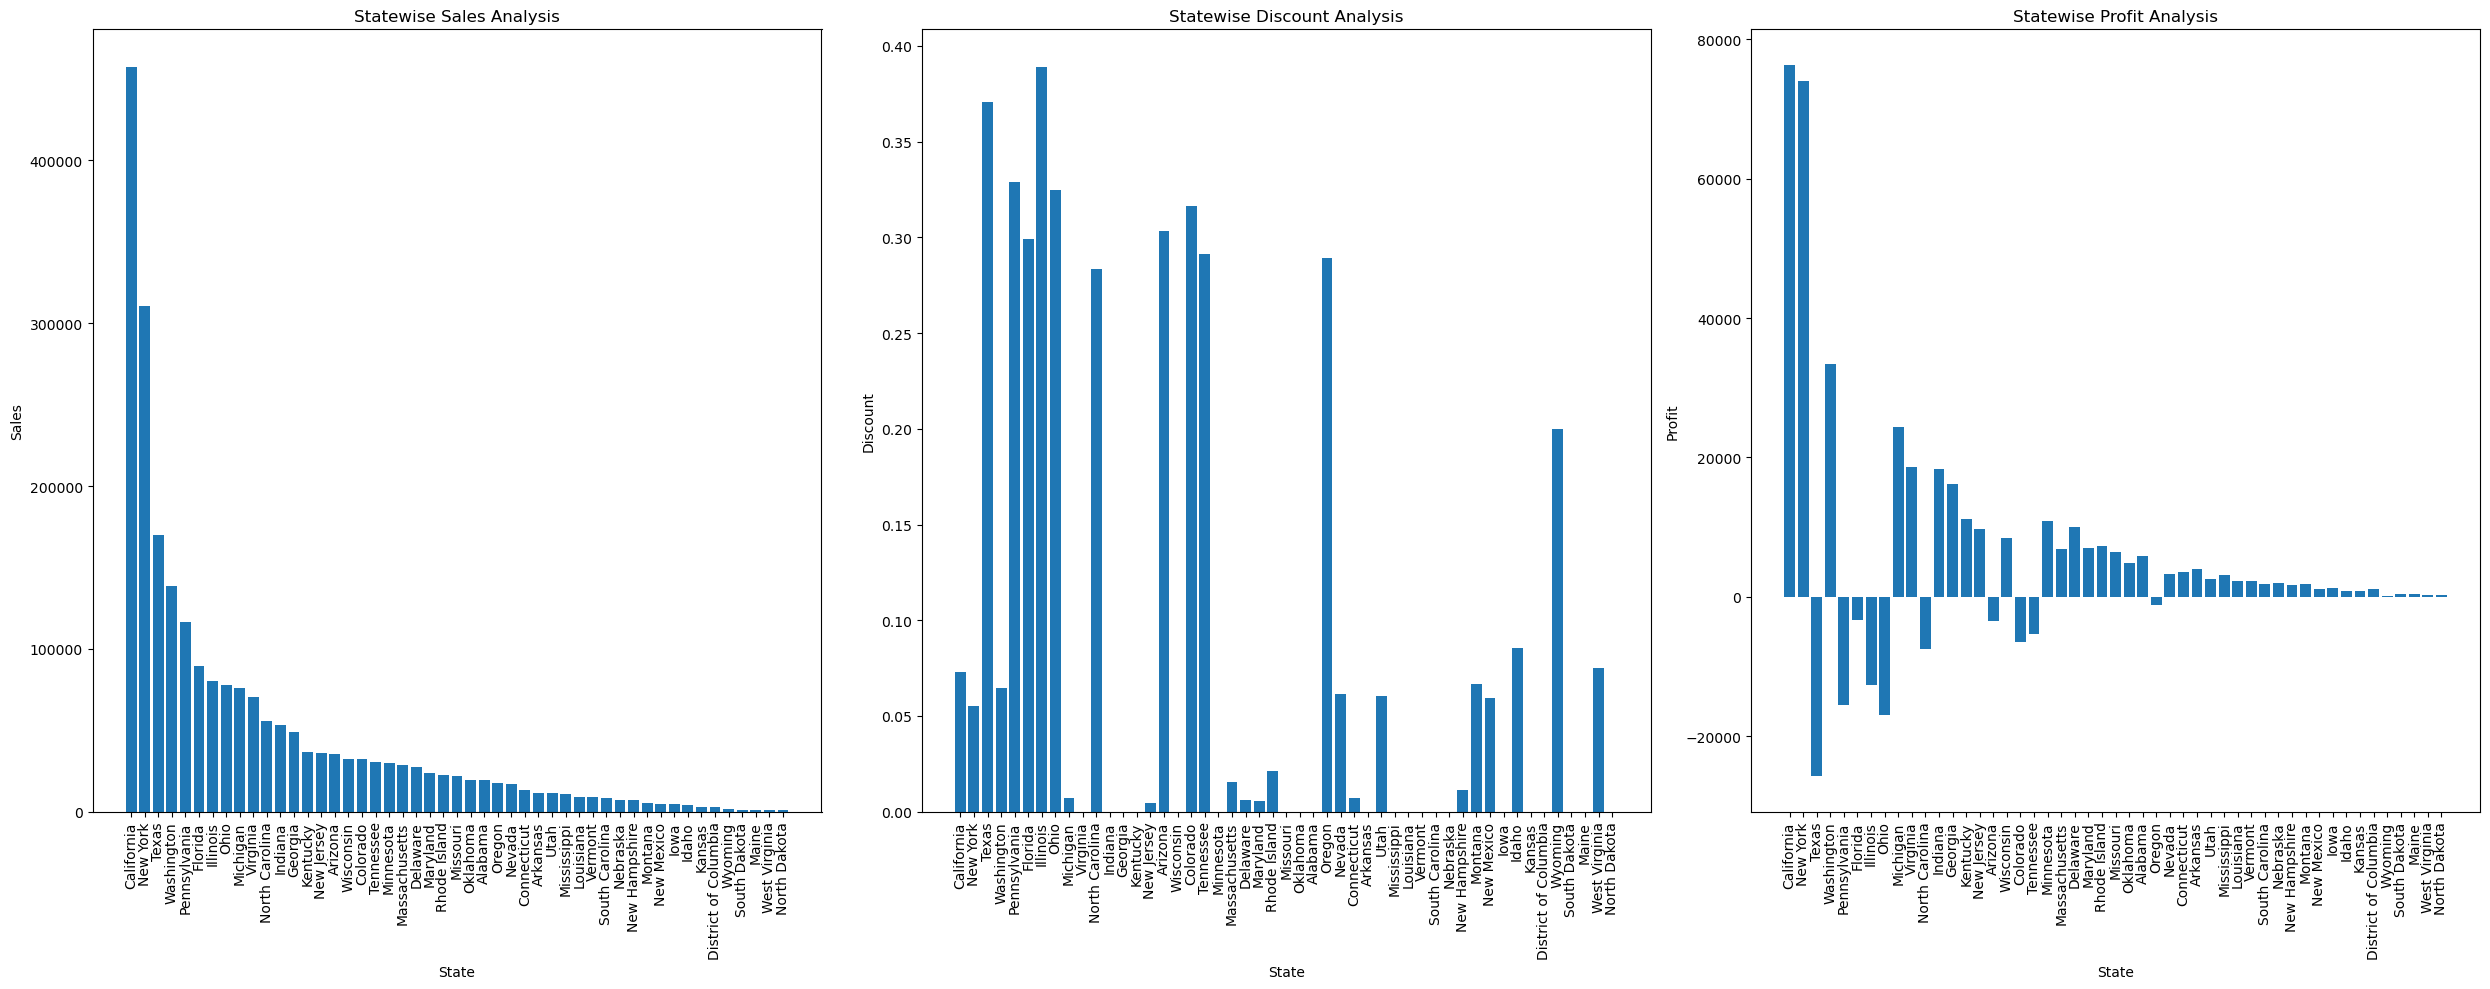

In [53]:
# Group the data by state and compute the total sales, discount and profit for each state
state_analysis = df.groupby(['State']).agg({'Sales': 'sum', 'Discount': 'mean', 'Profit': 'sum'}).reset_index()

# Sort the data in descending order of sales
state_analysis = state_analysis.sort_values(by='Sales', ascending=False)

# Plot the state-wise sales, discount and profit analysis
plt.figure(figsize=(25,10))

# Bar plot for sales
plt.subplot(1, 3, 1)
plt.bar(state_analysis['State'], state_analysis['Sales'])
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.title('Statewise Sales Analysis')

# Bar plot for discount
plt.subplot(1, 3, 2)
plt.bar(state_analysis['State'], state_analysis['Discount'])
plt.xlabel('State')
plt.ylabel('Discount')
plt.xticks(rotation=90)
plt.title('Statewise Discount Analysis')

# Bar plot for profit
plt.subplot(1, 3, 3)
plt.bar(state_analysis['State'], state_analysis['Profit'])
plt.xlabel('State')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.title('Statewise Profit Analysis')

plt.tight_layout()
plt.show()

## REGION WISE SALES, DISCOUNT AND PROFIT ANALYSIS

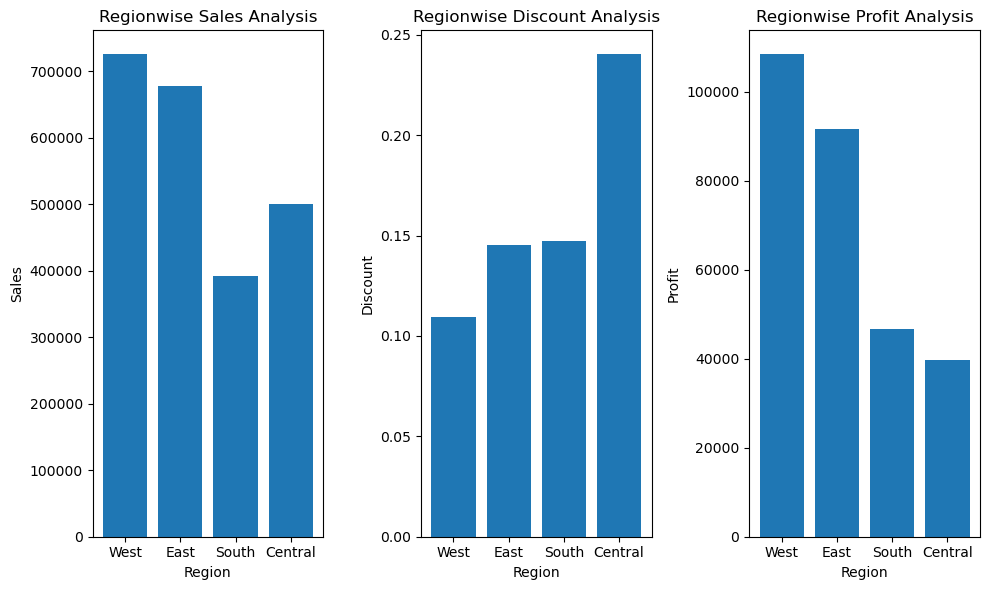

In [45]:
# Group the data by region and compute the total sales, discount and profit for each region
region_analysis = df.groupby(['Region']).agg({'Sales': 'sum', 'Discount': 'mean', 'Profit': 'sum'}).reset_index()

# Sort the data in descending order of profit
region_analysis = region_analysis.sort_values(by='Profit', ascending=False)

# Plot the region wise sales, discount and profit analysis
plt.figure(figsize=(10, 6))

# Bar plot for sales
plt.subplot(1, 3, 1)
plt.bar(region_analysis['Region'], region_analysis['Sales'])
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Regionwise Sales Analysis')

# Bar plot for discount
plt.subplot(1, 3, 2)
plt.bar(region_analysis['Region'], region_analysis['Discount'])
plt.xlabel('Region')
plt.ylabel('Discount')
plt.title('Regionwise Discount Analysis')

# Bar plot for profit
plt.subplot(1, 3, 3)
plt.bar(region_analysis['Region'], region_analysis['Profit'])
plt.xlabel('Region')
plt.ylabel('Profit')
plt.title('Regionwise Profit Analysis')

plt.tight_layout()
plt.show()


## CITY WISE SALES, DISCOUNT AND PROFIT ANALYSIS

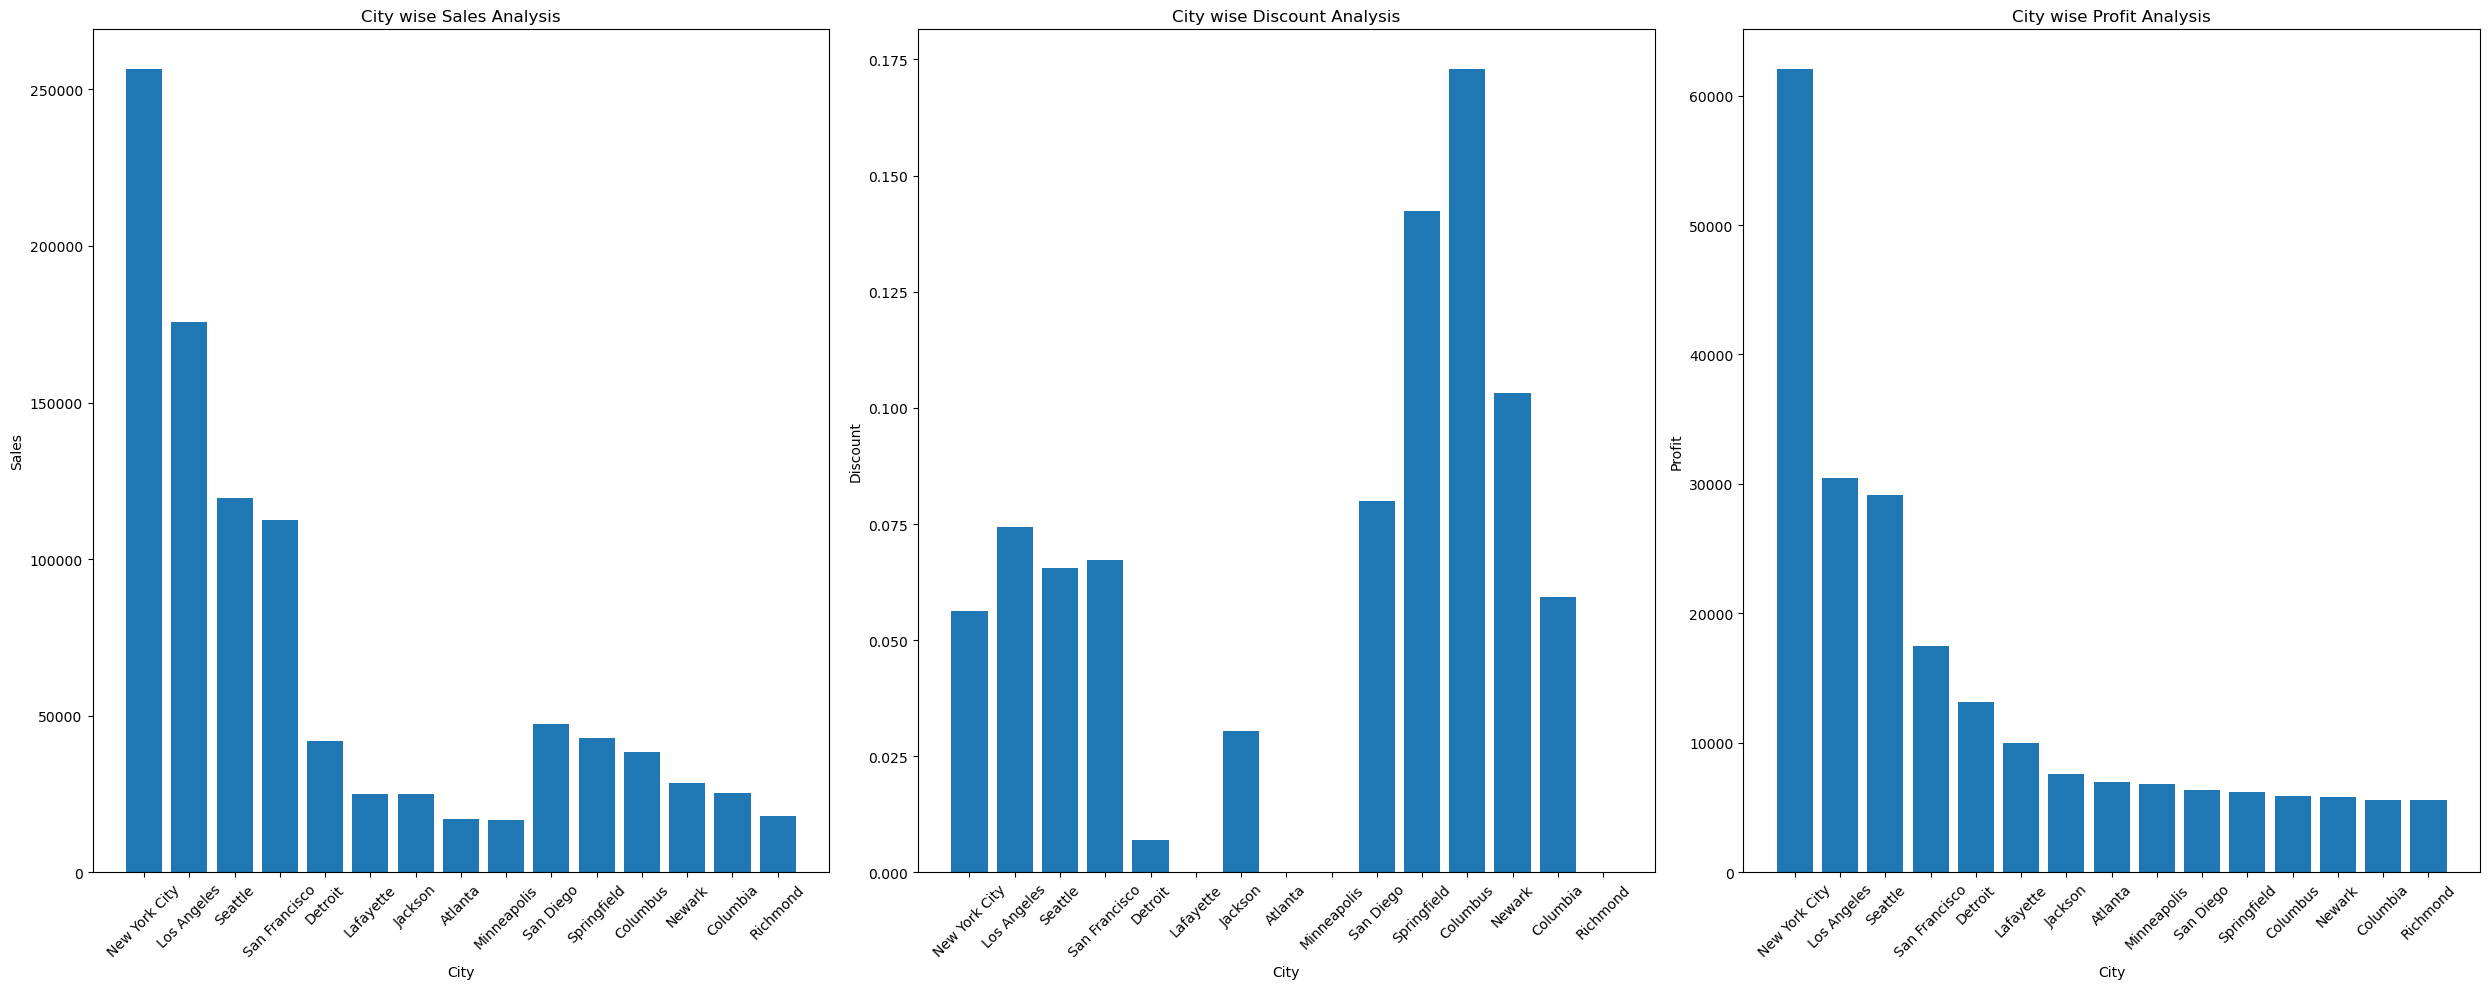

In [51]:
# Group the data by city and compute the total sales, discount and profit for each city
city_analysis = df.groupby(['City']).agg({'Sales': 'sum', 'Discount': 'mean', 'Profit': 'sum'}).reset_index()

# Sort the data in descending order of profit
city_analysis = city_analysis.sort_values(by='Profit', ascending=False)

# Select the top 15 cities based on profit
top_cities = city_analysis.head(15)

# Plot the citywise sales, discount and profit analysis
plt.figure(figsize=(25,10))

# Bar plot for sales
plt.subplot(1, 3, 1)
plt.bar(top_cities['City'], top_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(rotation = 45)
plt.title('City wise Sales Analysis')

# Bar plot for discount
plt.subplot(1, 3, 2)
plt.bar(top_cities['City'], top_cities['Discount'])
plt.xlabel('City')
plt.ylabel('Discount')
plt.xticks(rotation = 45)
plt.title('City wise Discount Analysis')

# Bar plot for profit
plt.subplot(1, 3, 3)
plt.bar(top_cities['City'], top_cities['Profit'])
plt.xlabel('City')
plt.ylabel('Profit')
plt.xticks(rotation = 45)
plt.title('City wise Profit Analysis')

plt.tight_layout()
plt.show()

## QUANTITY WISE SALES, DISCOUNT AND PROFIT ANALYSIS

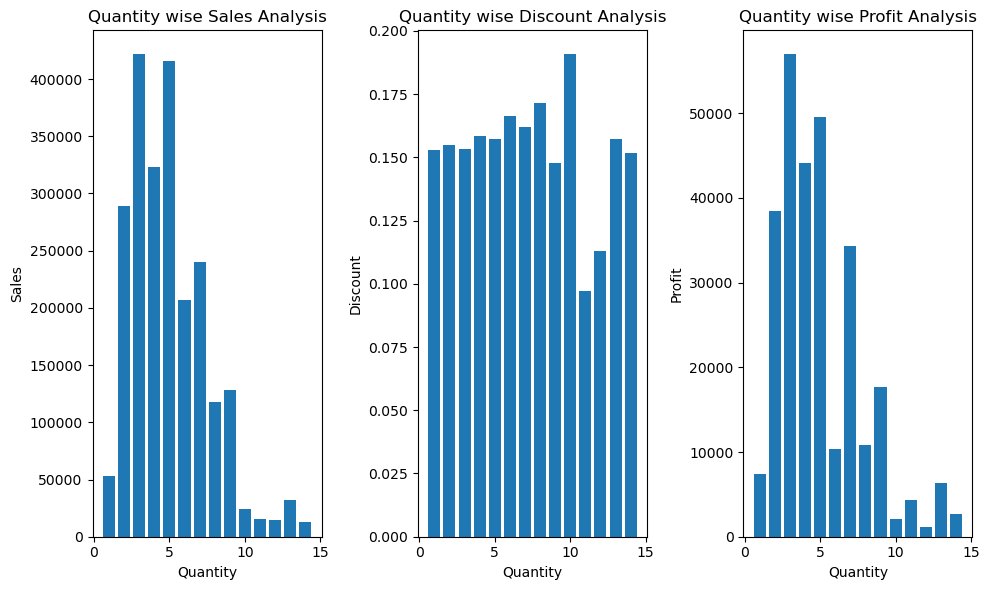

In [50]:
# Group the data by quantity and compute the total sales, discount and profit for each quantity
quantity_analysis = df.groupby(['Quantity']).agg({'Sales': 'sum', 'Discount': 'mean', 'Profit': 'sum'}).reset_index()

# Sort the data in descending order of quantity
quantity_analysis = quantity_analysis.sort_values(by='Quantity', ascending=False)

# Plot the quantitywise sales, discount and profit analysis
plt.figure(figsize=(10, 6))

# Bar plot for sales
plt.subplot(1, 3, 1)
plt.bar(quantity_analysis['Quantity'], quantity_analysis['Sales'])
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.title('Quantity wise Sales Analysis')

# Bar plot for discount
plt.subplot(1, 3, 2)
plt.bar(quantity_analysis['Quantity'], quantity_analysis['Discount'])
plt.xlabel('Quantity')
plt.ylabel('Discount')
plt.title('Quantity wise Discount Analysis')

# Bar plot for profit
plt.subplot(1, 3, 3)
plt.bar(quantity_analysis['Quantity'], quantity_analysis['Profit'])
plt.xlabel('Quantity')
plt.ylabel('Profit')
plt.title('Quantity wise Profit Analysis')

plt.tight_layout()
plt.show()

## CATEGORY WISE SALES, DISCOUNT AND PROFIT ANALYSIS

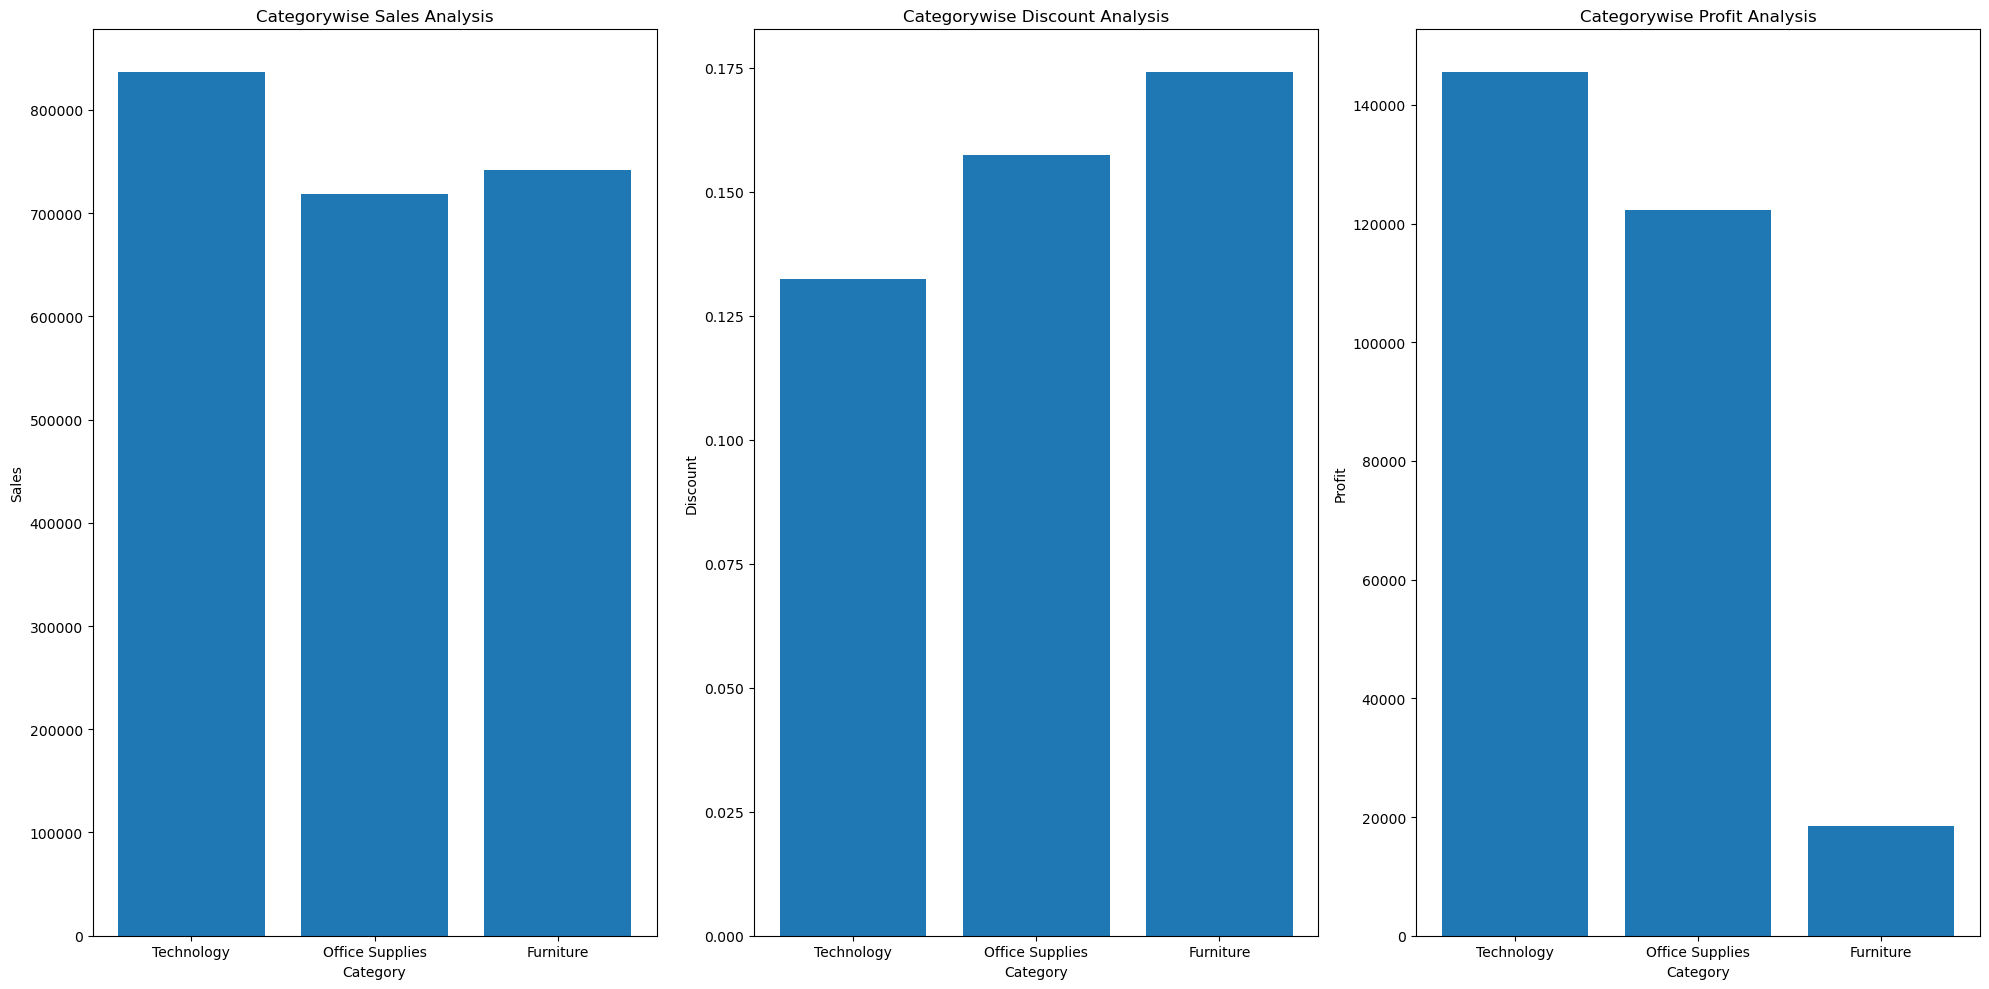

In [38]:
# Group the data by category and compute the total sales, discount and profit for each category
category_analysis = df.groupby(['Category']).agg({'Sales': 'sum', 'Discount': 'mean', 'Profit': 'sum'}).reset_index()

# Sort the data in descending order of profit
category_analysis = category_analysis.sort_values(by='Profit', ascending=False)

# Plot the category wise sales, discount and profit analysis
plt.figure(figsize=(20,10))

# Bar plot for sales
plt.subplot(1, 3, 1)
plt.bar(category_analysis['Category'], category_analysis['Sales'])
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Categorywise Sales Analysis')

# Bar plot for discount
plt.subplot(1, 3, 2)
plt.bar(category_analysis['Category'], category_analysis['Discount'])
plt.xlabel('Category')
plt.ylabel('Discount')
plt.title('Categorywise Discount Analysis')

# Bar plot for profit
plt.subplot(1, 3, 3)
plt.bar(category_analysis['Category'], category_analysis['Profit'])
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Categorywise Profit Analysis')

plt.tight_layout()
plt.show()


## SUB-CATEGORY WISE SALES, DISCOUNT AND PROFIT ANALYSIS

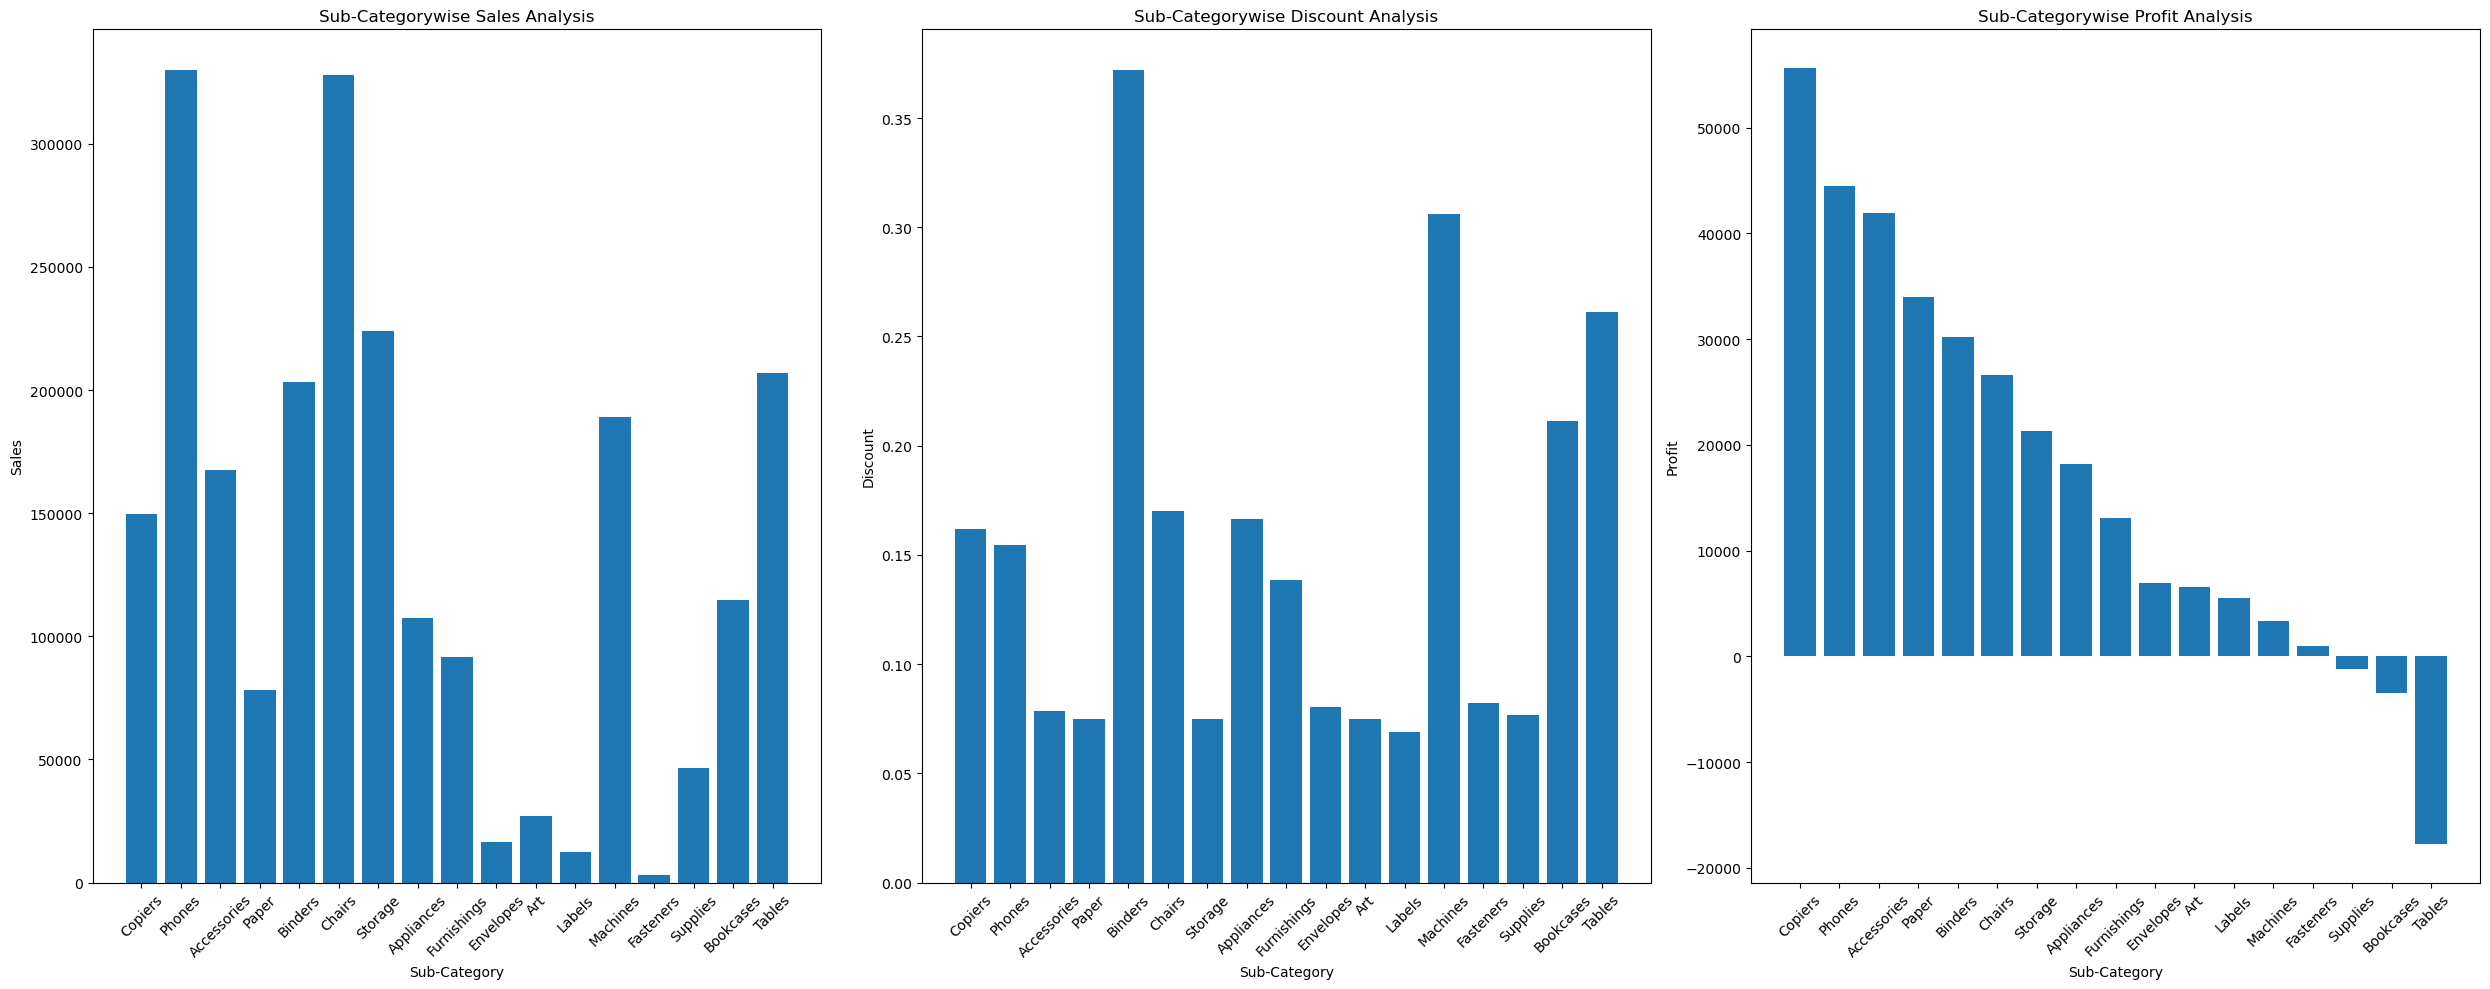

In [44]:
# Group the data by category and compute the total sales, discount and profit for each category
sub_category_analysis = df.groupby(['Sub-Category']).agg({'Sales': 'sum', 'Discount': 'mean', 'Profit': 'sum'}).reset_index()

# Sort the data in descending order of profit
sub_category_analysis = sub_category_analysis.sort_values(by='Profit', ascending=False)

# Plot the category wise sales, discount and profit analysis
plt.figure(figsize=(25,10))

# Bar plot for sales
plt.subplot(1, 3, 1)
plt.bar(sub_category_analysis['Sub-Category'], sub_category_analysis['Sales'])
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.ylabel('Sales')
plt.title('Sub-Categorywise Sales Analysis')

# Bar plot for discount
plt.subplot(1, 3, 2)
plt.bar(sub_category_analysis['Sub-Category'], sub_category_analysis['Discount'])
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.ylabel('Discount')
plt.title('Sub-Categorywise Discount Analysis')

# Bar plot for profit
plt.subplot(1, 3, 3)
plt.bar(sub_category_analysis['Sub-Category'], sub_category_analysis['Profit'])
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.ylabel('Profit')
plt.title('Sub-Categorywise Profit Analysis')

plt.tight_layout()
plt.show()


# Recommendations for the weak areas where you can work to make more profit.

### Sub-category: 
1. The high discount rate on the table is causing significant losses. To address this issue, it is recommended to either lower the discount rate or minimize the selling of the table product. Alternatively, analyzing the pricing and product mix of the table category and identifying opportunities for cost-cutting may also be helpful in improving profitability. Regular monitoring of sales and profit data can help track the effectiveness of these strategies and identify areas for further optimization.




2. Although some products such as Envelope, Art, Labels, and Fasteners may have lower profitability, their sales are also very low. To increase sales in the short term, it may be beneficial to offer temporary discounts on these products. However, it is important to carefully analyze the impact of these discounts on profitability and ensure that the discounts do not become a long-term strategy that harms the overall profitability of the company. 

###  Category:

The furniture category is currently experiencing high levels of discounting, resulting in the category being the least profitable. To address this issue, it is recommended to reduce the discount rate on furniture products to increase profitability. 

###  Region:

The discount rate in the central region is high, while the profit margin is low. To address this issue, it may be beneficial to explore strategies such as increasing prices, negotiating better deals with suppliers, or implementing cost-cutting measures to reduce expenses. Additionally, analyzing sales data to identify trends and patterns in consumer behavior can also provide insights that can inform decision-making and improve overall profitability in the region.